# Smoothers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

In [2]:
from filters import kalman, smoothers
from plots import plot_smoother

## Fixed-Interval Smoothing


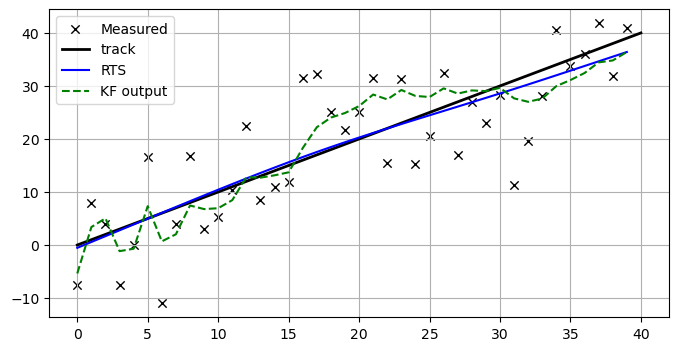

In [3]:
_, ax = plt.subplots(figsize=(8, 4))

plot_smoother.plot_rts(ax, 7.0)

# plt.savefig("../images/smoother-rts.png")

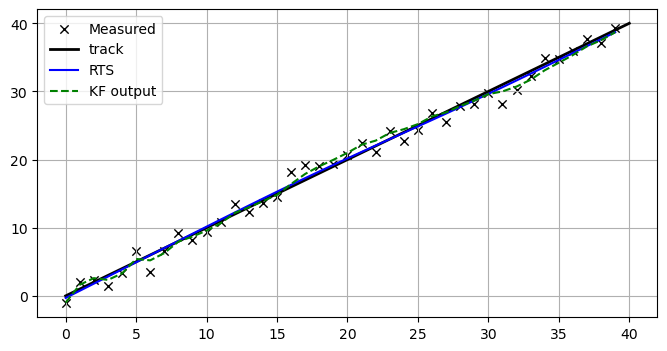

In [4]:
_, ax = plt.subplots(figsize=(8, 4))

plot_smoother.plot_rts(ax, 1.0)

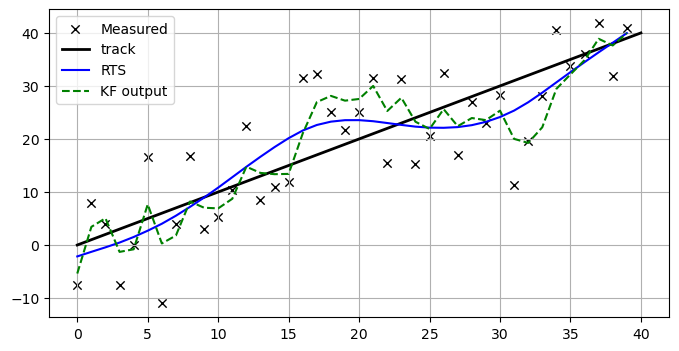

In [5]:
_, ax = plt.subplots(figsize=(8, 4))

plot_smoother.plot_rts(ax, R=7.0, Q=0.1)

gu


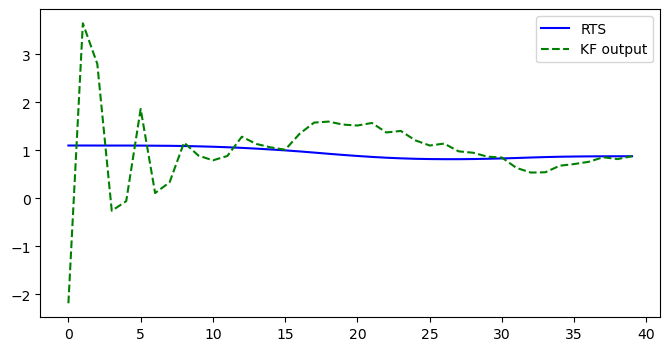

In [6]:
_, ax = plt.subplots(figsize=(8, 4))

plot_smoother.plot_rts(ax, 7.0, show_velocity=True)

## Fixed-Lag Smoothing


standard deviation fixed-lag: 2.616
standard deviation kalman: 2.616


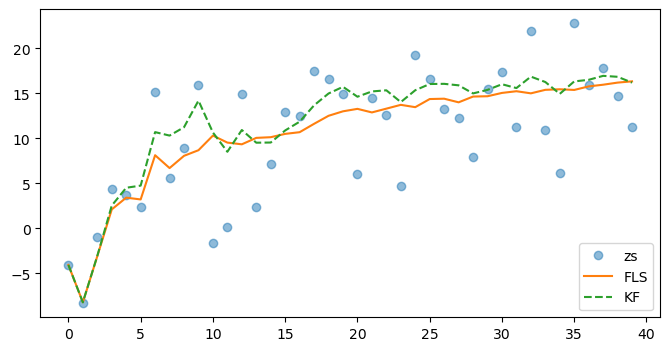

In [7]:
fls = smoothers.FixedLagSmoother(dim_x=2, dim_z=1, N=8)
fls.x = np.array([0.0, 0.5])
fls.F = np.array([[1.0, 1.0], [0.0, 1.0]])
fls.H = np.array([[1.0, 0.0]])
fls.P *= 200
fls.R *= 5.0
fls.Q *= 0.001

kf = kalman.KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0.0, 0.5])
kf.F = np.array([[1.0, 1.0], [0.0, 1.0]])
kf.H = np.array([[1.0, 0.0]])
kf.P *= 200
kf.R *= 5.0
kf.Q *= 0.001
N = 4  # size of lag

nom = np.array([t / 2.0 for t in range(40)])
zs = np.array([t + random.randn() * 5.1 for t in nom])
for z in zs:
    fls.smooth(z)

kf_x, _, _, _ = kf.batch_filter(zs)
x_smooth = np.array(fls.xSmooth)[:, 0]
fls_res = np.abs(x_smooth - nom)
kf_res = np.abs(kf_x[:, 0] - nom)

_, ax = plt.subplots(figsize=(8, 4))

ax.plot(zs, "o", alpha=0.5, label="zs")
ax.plot(x_smooth, label="FLS")
ax.plot(kf_x[:, 0], label="KF", ls="--")
ax.legend(loc=4)
print(f"standard deviation fixed-lag: {np.mean(fls_res):.3f}")
print(f"standard deviation kalman: {np.mean(fls_res):.3f}")

# plt.savefig("../images/smoother-fls.png")